In [33]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

import json
import time
import datetime
import seaborn as sns

In [4]:
abstract = pd.read_csv("raw/abstractText.csv")

In [7]:
topic = pd.read_csv('raw/AIbyTopic.csv')

In [98]:
topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FundingOrgName         838 non-null    object 
 1   ProjectReference       838 non-null    object 
 2   LeadROName             838 non-null    object 
 3   Department             838 non-null    object 
 4   ProjectCategory        838 non-null    object 
 5   PISurname              838 non-null    object 
 6   PIFirstName            838 non-null    object 
 7   PIOtherNames           196 non-null    object 
 8   PI ORCID iD            230 non-null    object 
 9   StudentSurname         0 non-null      float64
 10  StudentFirstName       0 non-null      float64
 11  StudentOtherNames      0 non-null      float64
 12  Student ORCID iD       0 non-null      float64
 13  Title                  838 non-null    object 
 14  StartDate              838 non-null    object 
 15  EndDat

In [99]:
df = topic[["ProjectId","Title","AwardPounds","StartDate", "EndDate"]].merge(abstract, left_on = "ProjectId", right_on = "id", how = "inner")

In [31]:
df.shape

(838, 31)

In [27]:
abstract.shape

(838, 6)

In [30]:
topic.shape

(838, 31)

So exam the table, nothing is ommited, everthing is joint perfectly together

In [64]:
df["StartDate"].sample(5) # DD-MM-YY

287    30/05/2012
687    21/12/2009
71     01/09/2017
306    01/10/2009
668    01/11/2007
Name: StartDate, dtype: object

In [65]:
df["StartDate"].head(2)

0    01/11/2012
1    01/02/2020
Name: StartDate, dtype: object

In [120]:
df['StartDate'] = pd.to_datetime(df["StartDate"], format='%d/%m/%Y')
df['EndDate'] = pd.to_datetime(df["EndDate"], format='%d/%m/%Y')
df['duration'] = pd.to_timedelta(df['EndDate'] - df['StartDate'])
df['wagerate'] = df['AwardPounds']/df['duration'].dt.days

## First Glance of AI Funding

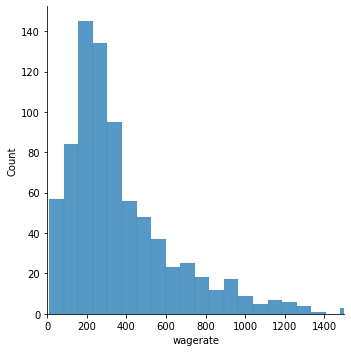

In [134]:
sns.displot(df['wagerate']).set(xlim = (0, 1500))

In [136]:
df['wagerate'].mean()

680.5340461170013

In [137]:
df['wagerate'].median()

303.597573446721

Just first exploration of the data. The average AI funding is 680 pound per day. This could be greatly misleading given some of the UK  

In [140]:
#df.to_csv("raw/complete.csv")

In [209]:
fundOrg = topic[['AwardPounds','FundingOrgName','FundingOrgId']].groupby(["FundingOrgName","FundingOrgId"]).sum()
fundOrg

,,AwardPounds
FundingOrgName,FundingOrgId,
AHRC,1291772D-DFCE-493A-AEE7-24F7EEAFE0E9,19796129
BBSRC,2512EF1C-401B-4222-9869-A770D4C5FAC7,6988981
EPSRC,798CB33D-C79E-4578-83F2-72606407192C,604431797
ESRC,924BE15C-91F2-4AAD-941A-3F338324B6AE,22537341
NERC,8A03ED41-E67D-4F4A-B5DD-AAFB272B6471,4667133
STFC,D7F4F462-0518-4784-908A-D12633C139B3,1625064


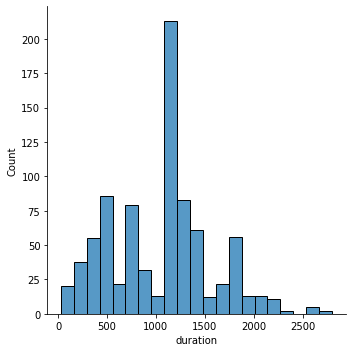

In [204]:
sns.displot(df['duration'].dt.days)

In [222]:
topic[['AwardPounds', 'LeadROName']].groupby(['LeadROName']).sum().sort_values(by = 'AwardPounds')

,AwardPounds
LeadROName,
University of Abertay Dundee,15198
Oxford Brookes University,15237
Quadram Institute Bioscience,24416
Kingston University,31606
Roehampton University,35949
...,...
University of Oxford,32309089
University of Southampton,36563933
University of Bristol,36911989


In [225]:
topic[['AwardPounds', 'ProjectCategory']].groupby(['ProjectCategory']).sum()

,AwardPounds
ProjectCategory,
Fellowship,57416178
Research Grant,602630267


In [218]:
i = "1291772D-DFCE-493A-AEE7-24F7EEAFE0E9"
url = "https://gtr.ukri.org/gtr/api/organisations.json"

response = requests.get(url)
#x = response.json()